# Bigram 語言模型 (N-Gram 的特例)

## 核心概念
N-Gram 模型是一種基於統計的語言模型，透過前 N-1 個字預測下一個字。
Bigram (N=2) 是最簡單的情況：**只看前 1 個字，預測下 1 個字**。

## 數學原理
$$P(w_n | w_{n-1}) = \frac{Count(w_{n-1}, w_n)}{Count(w_{n-1})}$$

- 分子：兩個字連續出現的次數
- 分母：前一個字出現的總次數

## 應用場景
- **文字生成**：根據機率隨機採樣，生成新句子
- **輸入法預測**：預測用戶下一個可能輸入的字
- **拼寫檢查**：判斷字詞組合的合理性

In [39]:
import random
import matplotlib.pyplot as plt
from collections import defaultdict, Counter

In [64]:
# ==========================================
# 1. 基礎設定與數據準備
# ==========================================

# 解決 Matplotlib 中文顯示問題 (嘗試加載常見中文字體)
def configure_fonts():
    import platform
    system_name = platform.system()
    if system_name == "Windows":
        plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei', 'SimHei']
    elif system_name == "Darwin":  # Mac
        plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang TC']
    else:  # Linux / Colab
        plt.rcParams['font.sans-serif'] = ['WenQuanYi Micro Hei', 'SimHei']
    plt.rcParams['axes.unicode_minus'] = False


configure_fonts()

# 玩具語料庫
corpus = [
    "我是天才程式設計師",
    "他是傻瓜軟體工程師",
    "天才寫出完美程式碼",
    "傻瓜寫出充滿錯誤碼",
    "我是天才所以升職了",
    "他是傻瓜所以被炒了",
    "她是天才優秀的學生",
    "他是傻瓜愚笨的學生",
    "天才考試都考一百分",
    "傻瓜考試都考零蛋分",
    "我不是傻瓜我聰明啊",
    "他不是天才他很笨啊",
    "天才解決問題超級快",
    "傻瓜解決問題超級慢",
    "我是天才所以很自信",
    "他是傻瓜所以很自卑",
]


# 分詞函數
def tokenize(text):
    return [char for char in text]

print(tokenize(corpus))

['我是天才程式設計師', '他是傻瓜軟體工程師', '天才寫出完美程式碼', '傻瓜寫出充滿錯誤碼', '我是天才所以升職了', '他是傻瓜所以被炒了', '她是天才優秀的學生', '他是傻瓜愚笨的學生', '天才考試都考一百分', '傻瓜考試都考零蛋分', '我不是傻瓜我聰明啊', '他不是天才他很笨啊', '天才解決問題超級快', '傻瓜解決問題超級慢', '我是天才所以很自信', '他是傻瓜所以很自卑']


In [18]:
# ==========================================
# 2. 模型訓練 (計算 Bigram 機率)
# ==========================================

def train_bigram_model(corpus):
    # 步驟 1: 計算計數
    ngrams_count = defaultdict(Counter)
    for text in corpus:
        tokens = tokenize(text)
        # Bigram: 看 1 個字預測下 1 個字
        for index in range(len(tokens) - 1):
            current_char = tokens[index]  # 當前字 (Input)
            next_char = tokens[index + 1]  # 下一個字 (Target)
            ngrams_count[current_char][next_char] += 1

    # 步驟 2: 轉換為機率
    ngram_probs = defaultdict(Counter)
    for prefix, tokens_count in ngrams_count.items():
        total_count = sum(tokens_count.values())
        for token, count in tokens_count.items():
            ngram_probs[prefix][token] = count / total_count

    return ngram_probs


# 訓練模型
bigram_model = train_bigram_model(corpus)
print(bigram_model)

defaultdict(<class 'collections.Counter'>, {'我': Counter({'是': 0.6, '不': 0.2, '很': 0.2}), '是': Counter({'天': 0.5, '傻': 0.5}), '天': Counter({'才': 1.0}), '才': Counter({'所': 0.25, '程': 0.125, '寫': 0.125, '學': 0.125, '考': 0.125, '他': 0.125, '解': 0.125}), '程': Counter({'式': 0.75, '師': 0.25}), '式': Counter({'碼': 0.6666666666666666, '設': 0.3333333333333333}), '設': Counter({'計': 1.0}), '計': Counter({'師': 1.0}), '他': Counter({'是': 0.6666666666666666, '不': 0.16666666666666666, '很': 0.16666666666666666}), '傻': Counter({'瓜': 1.0}), '瓜': Counter({'所': 0.25, '工': 0.125, '寫': 0.125, '學': 0.125, '考': 0.125, '我': 0.125, '解': 0.125}), '工': Counter({'程': 1.0}), '寫': Counter({'出': 1.0}), '出': Counter({'完': 0.5, '充': 0.5}), '完': Counter({'美': 1.0}), '美': Counter({'的': 1.0}), '的': Counter({'程': 1.0}), '充': Counter({'滿': 1.0}), '滿': Counter({' ': 1.0}), ' ': Counter({'b': 0.5, '的': 0.5}), 'b': Counter({'u': 1.0}), 'u': Counter({'g': 1.0}), 'g': Counter({' ': 1.0}), '所': Counter({'以': 1.0}), '以': Counter({'很'

--- 1. 模型訓練完成 ---
語料庫範例: 我是天才程式設計師...

--- 2. 測試生成 (隨機性展示) ---
提示詞 (Prompt): 他
生成結果 1: 他是傻瓜考一百分
生成結果 2: 他是天才學生
生成結果 3: 他是傻瓜所以升職了

--- 3. 繪製長條圖 ---


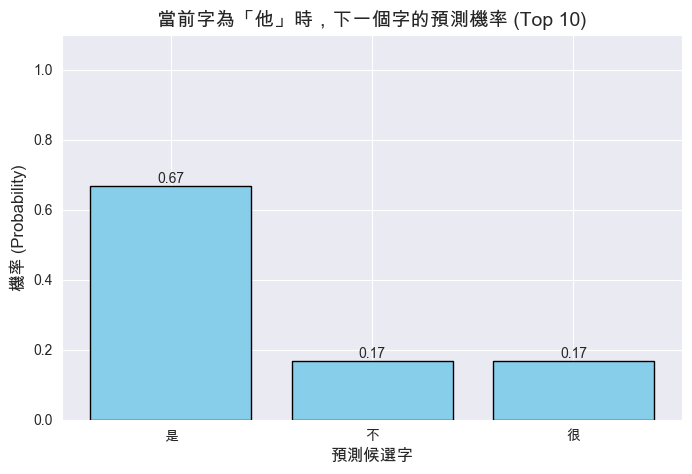

In [72]:
# ==========================================
# 3. 生成邏輯 (使用機率採樣)
# ==========================================

def generate_text(prefix, model, length=9):
    """
    使用加權隨機採樣生成文本
    """
    current_char = prefix[-1]  # 取前綴的最後一個字作為起點
    generated = list(prefix)

    for _ in range(length):
        if current_char not in model:
            break  # 沒見過的字，停止生成

        # 獲取候選字與機率
        next_chars_probs = model[current_char]
        candidates = list(next_chars_probs.keys())
        weights = list(next_chars_probs.values())

        # 核心：根據機率隨機選擇 (Weighted Sampling)
        next_char = random.choices(candidates, weights=weights, k=1)[0]

        generated.append(next_char)
        current_char = next_char

    return "".join(generated)


# ==========================================
# 4. 視覺化 (單字預測機率長條圖)
# ==========================================
def plot_next_token_probs(model, current_char, top_k=5):
    """
    繪製給定字符後，出現機率最高的 top_k 個字的長條圖
    """
    if current_char not in model:
        print(f"錯誤：字符 '{current_char}' 不在語料庫的模型字典中。")
        return

    # 1. 獲取數據並排序
    probs = model[current_char]
    # 將字典轉換為列表並按機率降序排序，取前 k 個
    sorted_probs = sorted(probs.items(), key=lambda item: item[1], reverse=True)[:top_k]

    # 2. 準備 X 軸與 Y 軸數據
    tokens = [item[0] for item in sorted_probs]
    values = [item[1] for item in sorted_probs]

    # 3. 繪圖
    plt.figure(figsize=(8, 5))
    bars = plt.bar(tokens, values, color='skyblue', edgecolor='black')

    # 4. 美化圖表
    plt.title(f"當前字為「{current_char}」時，下一個字的預測機率 (Top {top_k})", fontsize=14)
    plt.xlabel("預測候選字", fontsize=12)
    plt.ylabel("機率 (Probability)", fontsize=12)
    plt.ylim(0, 1.1) # Y 軸固定在 0~1 之間

    # 在柱狀圖上方標示數值
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                 f'{height:.2f}',
                 ha='center', va='bottom', fontsize=10)

    plt.show()


# ==========================================
# 5. 執行與測試
# ==========================================

print("--- 1. 模型訓練完成 ---")
print(f"語料庫範例: {corpus[0]}...")

print("\n--- 2. 測試生成 (隨機性展示) ---")
start_char = "他"
print(f"提示詞 (Prompt): {start_char}")
for i in range(3):
    print(f"生成結果 {i + 1}: {generate_text(start_char, bigram_model)}")

print("\n--- 3. 繪製長條圖 ---")
try:
    plot_next_token_probs(bigram_model, start_char, top_k=10)
except Exception as e:
    print(f"繪圖失敗 (可能是字體問題): {e}")